# Libraries Importing

In [1]:
# import libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from difflib import get_close_matches
from scipy.sparse import csr_matrix
from IPython.display import Image, display
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Data Importing

## Books Dataset

In [2]:
df_books =  pd.read_csv("D:/hp/Documents/CDS513/Assignment/goodbooks-10k-master/books.csv")
df_books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


## Tags Dataset

In [3]:
df_tags =  pd.read_csv("D:/hp/Documents/CDS513/Assignment/goodbooks-10k-master/tags.csv")
df_tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


## Ratings Dataset

In [4]:
df_ratings =  pd.read_csv("D:/hp/Documents/CDS513/Assignment/goodbooks-10k-master/ratings.csv")
df_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


## To Read Dataset

In [5]:
df_to_read =  pd.read_csv("D:/hp/Documents/CDS513/Assignment/goodbooks-10k-master/to_read.csv")
df_to_read.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


## Book Tags Dataset

In [6]:
df_book_tags =  pd.read_csv("D:/hp/Documents/CDS513/Assignment/goodbooks-10k-master/book_tags.csv")
df_book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


## Entity Relationship Diagram

In order to view the relationship between each table, an entity relationship diagram is being drawn. 

![img](ERD.png)

## Dataset Merging

In [7]:
# Merges the `df_book_tags` and `df_tags` DataFrames based on the 'tag_id' column.
# This combines the book IDs with their corresponding tag names.
df_book_tags_merged = pd.merge(df_book_tags, df_tags, how = 'left', left_on = 'tag_id'
                               , right_on = 'tag_id')
df_book_tags_merged.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,1,11305,37174,fantasy
2,1,11557,34173,favorites
3,1,8717,12986,currently-reading
4,1,33114,12716,young-adult


In [8]:
# Checks for null values in the merged DataFrame and prints the results.
print("Null values in Book Tags Merged DataFrame: \n", df_book_tags_merged.isnull().sum())

Null values in Book Tags Merged DataFrame: 
 goodreads_book_id    0
tag_id               0
count                0
tag_name             0
dtype: int64


# Exploratory Data Analysis

In [9]:
# Prints the shape (number of rows and columns) of each DataFrame.
print("Books DataFrame shape    : ", df_books.shape)
print("Tags DataFrame shape     : ", df_tags.shape)
print("Ratings DataFrame shape  : ", df_ratings.shape)
print("To Read DataFrame shape  : ", df_to_read.shape)
print("Book Tags DataFrame shape: ", df_book_tags.shape)

Books DataFrame shape    :  (10000, 23)
Tags DataFrame shape     :  (34252, 2)
Ratings DataFrame shape  :  (5976479, 3)
To Read DataFrame shape  :  (912705, 2)
Book Tags DataFrame shape:  (999912, 3)


In [10]:
# Prints the total number of null values in each DataFrame
print("Null values in Books DataFrame: ", df_books.isnull().sum().sum())
print("Null values in Tags DataFrame: ", df_tags.isnull().sum().sum())
print("Null values in Ratings DataFrame: ", df_ratings.isnull().sum().sum())
print("Null values in To Read DataFrame: ", df_to_read.isnull().sum().sum())
print("Null values in Book Tags DataFrame: ", df_book_tags.isnull().sum().sum())

Null values in Books DataFrame:  2975
Null values in Tags DataFrame:  0
Null values in Ratings DataFrame:  0
Null values in To Read DataFrame:  0
Null values in Book Tags DataFrame:  0


## Books Dataset

In [11]:
# Displays the data types of each column in the Books DataFrame.
df_books.dtypes

book_id                        int64
goodreads_book_id              int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
dtype: object

In [12]:
# Converts specific columns in the Books DataFrame to string type.
df_books['isbn']            = df_books['isbn'].astype('str')
df_books['title']           = df_books['title'].astype('str')
df_books['authors']         = df_books['authors'].astype('str')
df_books['image_url']       = df_books['image_url'].astype('str')
df_books['language_code']   = df_books['language_code'].astype('str')
df_books['original_title']  = df_books['original_title'].astype('str')
df_books['small_image_url'] = df_books['small_image_url'].astype('str')

In [13]:
# Iterates through each column of the Books DataFrame and prints the number of unique values.
for column in df_books:
  unique_vals = np.unique(df_books[column])
  nr_values = len(unique_vals)
  if nr_values < 36:
    print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
  else:
    print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature book_id :10000
The number of values for feature goodreads_book_id :10000
The number of values for feature best_book_id :10000
The number of values for feature work_id :10000
The number of values for feature books_count :597
The number of values for feature isbn :9301
The number of values for feature isbn13 :9154
The number of values for feature authors :4664
The number of values for feature original_publication_year :294
The number of values for feature original_title :9275
The number of values for feature title :9964
The number of values for feature language_code :26 -- ['ara' 'dan' 'en' 'en-CA' 'en-GB' 'en-US' 'eng' 'fil' 'fre' 'ger' 'ind'
 'ita' 'jpn' 'mul' 'nan' 'nl' 'nor' 'per' 'pol' 'por' 'rum' 'rus' 'spa'
 'swe' 'tur' 'vie']
The number of values for feature average_rating :184
The number of values for feature ratings_count :9003
The number of values for feature work_ratings_count :9053
The number of values for feature work_text_reviews_count :458

### Histograms of Average Rating

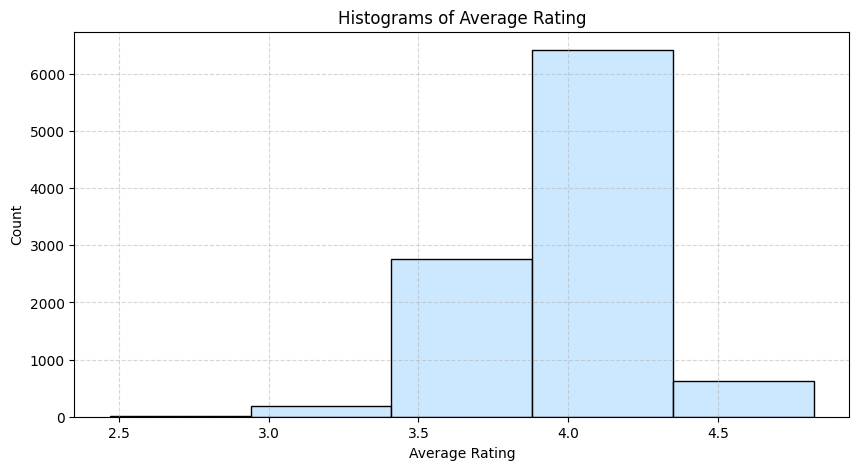

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(data = df_books, x='average_rating', bins=5, color='#bae1ff') 
plt.title("Histograms of Average Rating")
plt.xlabel("Average Rating")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Correlation Matrix

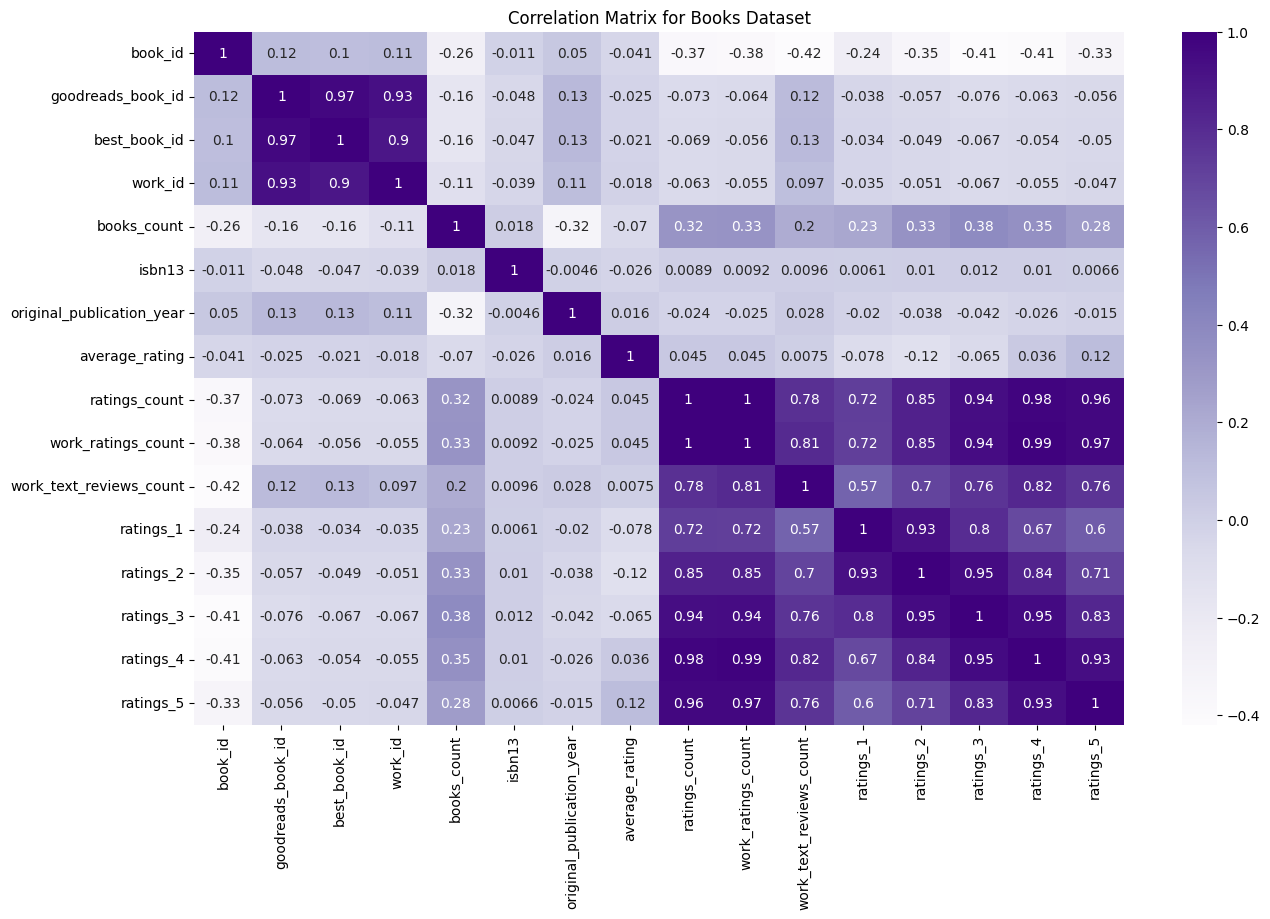

In [15]:
numerical_cols_books = df_books.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 9))
sns.heatmap(df_books[numerical_cols_books].corr(), annot=True, cmap='Purples')
plt.title('Correlation Matrix for Books Dataset')
plt.show()

## Ratings Dataset

In [16]:
# Displays the data types of each column in the Ratings DataFrame.
df_ratings.dtypes

user_id    int64
book_id    int64
rating     int64
dtype: object

In [17]:
# Iterates through each column of the Ratings DataFrame and prints the number of unique values.
for column in df_ratings:
  unique_vals = np.unique(df_ratings[column])
  nr_values = len(unique_vals)
  if nr_values < 36:
    print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
  else:
    print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature user_id :53424
The number of values for feature book_id :10000
The number of values for feature rating :5 -- [1 2 3 4 5]


### Distribution of Ratings

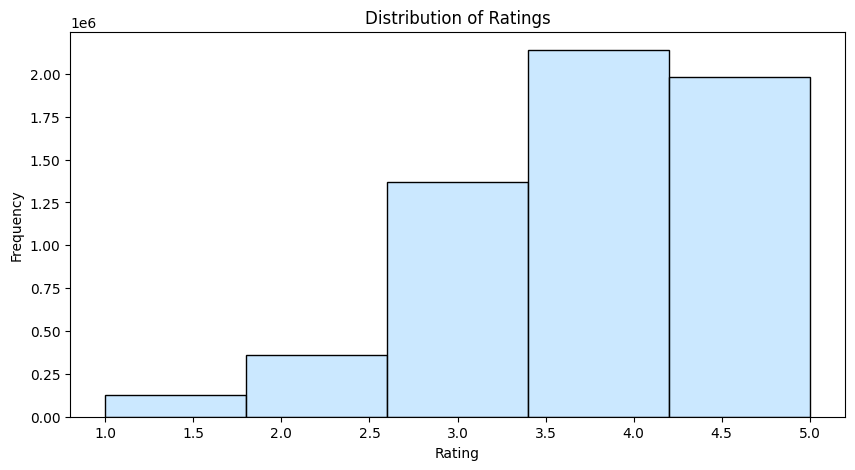

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df_ratings['rating'], bins=5, color="#bae1ff")
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Correlation Matrix

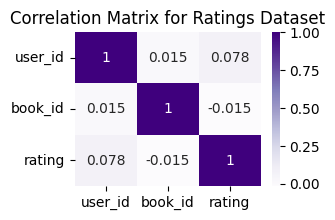

In [19]:
numerical_cols_ratings = df_ratings.select_dtypes(include=np.number).columns
plt.figure(figsize=(3, 2))
sns.heatmap(df_ratings[numerical_cols_ratings].corr(), annot=True, cmap='Purples')
plt.title('Correlation Matrix for Ratings Dataset')
plt.show()

## To Read Dataset

In [20]:
# Displays the data types of each column in the To Read DataFrame.
df_to_read.dtypes

user_id    int64
book_id    int64
dtype: object

In [21]:
# Iterates through each column of the To Read DataFrame and prints the number of unique values.
for column in df_to_read:
  unique_vals = np.unique(df_to_read[column])
  nr_values = len(unique_vals)
  if nr_values < 36:
    print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
  else:
    print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature user_id :48871
The number of values for feature book_id :9986


### Correlation Matrix

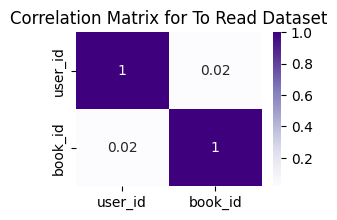

In [22]:
numerical_cols_to_read = df_to_read.select_dtypes(include=np.number).columns
plt.figure(figsize=(3, 2))
sns.heatmap(df_to_read[numerical_cols_to_read].corr(), annot=True, cmap='Purples')
plt.title('Correlation Matrix for To Read Dataset')
plt.show()

Use this dataset for evaluation. 

## Book Tags (Merged) Dataset

In [23]:
# Displays the data types of each column in the Book Tags Merged DataFrame.
df_book_tags_merged.dtypes

goodreads_book_id     int64
tag_id                int64
count                 int64
tag_name             object
dtype: object

In [24]:
# Iterates through each column of the Book Tags Merged DataFrame and prints the number of unique values.
for column in df_book_tags_merged:
  unique_vals = np.unique(df_book_tags_merged[column])
  nr_values = len(unique_vals)
  if nr_values < 36:
    print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
  else:
    print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature goodreads_book_id :10000
The number of values for feature tag_id :34252
The number of values for feature count :9401
The number of values for feature tag_name :34252


### Top 10 Most Frequent Tags

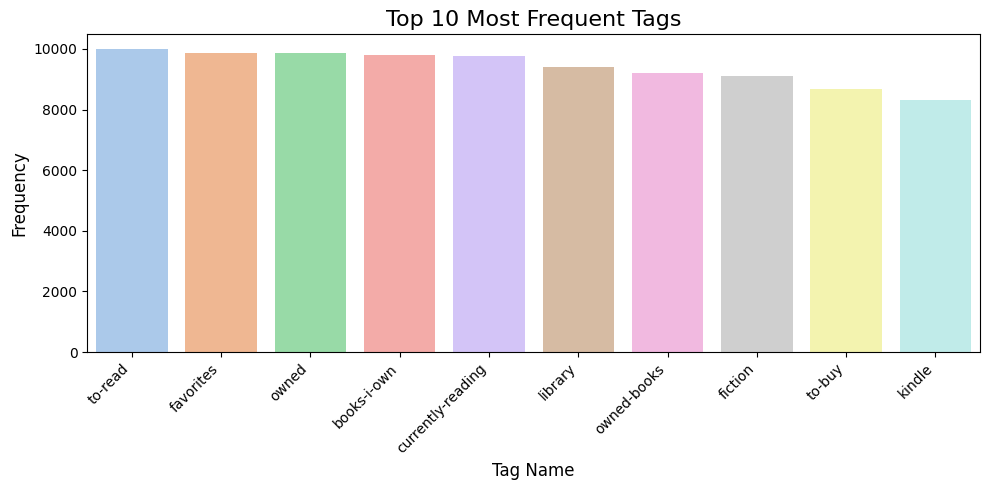

In [25]:
top_10_tags = df_book_tags_merged['tag_name'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_tags.index, y=top_10_tags.values, palette="pastel", hue=top_10_tags.index)
plt.title("Top 10 Most Frequent Tags", fontsize=16)
plt.xlabel("Tag Name", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

### Correlation Matrix

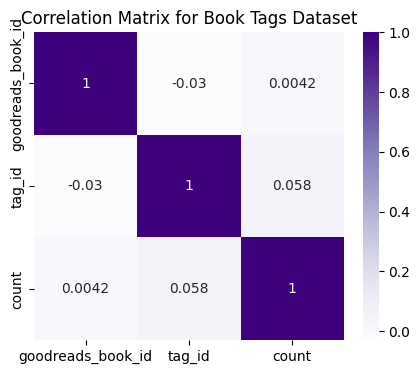

In [26]:
numerical_cols_book_tags = df_book_tags_merged.select_dtypes(include=np.number).columns

plt.figure(figsize=(5, 4))
sns.heatmap(df_book_tags_merged[numerical_cols_book_tags].corr(), annot=True, cmap='Purples')
plt.title('Correlation Matrix for Book Tags Dataset')
plt.show()

# Data Cleaning

## Keep Related and Hot Tag Names

### Removing Punctuation and Numbers

In [27]:
# Defines a function to remove punctuation and numbers from a given text string.
def remove_punctuation_numbers(text):
  text = re.sub(r'[^\w]', '', text)
  text = re.sub(r'\d+', '', text)
  return text.lower()

In [28]:
# Applies the `remove_punctuation_numbers` function to the 'tag_name' column of the Book Tags Merged DataFrame.
df_book_tags_merged['tag_name'] = df_book_tags_merged['tag_name'].apply(remove_punctuation_numbers)

In [29]:
df_book_tags_merged.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,toread
1,1,11305,37174,fantasy
2,1,11557,34173,favorites
3,1,8717,12986,currentlyreading
4,1,33114,12716,youngadult


### Retrieve Common Genres from GoodReads using BeautifulSoup

Retrieve common genres from https://www.goodreads.com/genres?ref=nav_brws_genres

In [30]:
# Retrieve common genres from https://www.goodreads.com/genres?ref=nav_brws_genres
url = "https://www.goodreads.com/genres?ref=nav_brws_genres"
# Set up headers to mimic a browser request
# This is important to avoid being blocked by the server for making automated requests.
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}  # Add User-Agent header to mimic a browser request
# Pass the headers to the request
response = requests.get(url, headers=headers)  
# Raise an exception for bad status codes
response.raise_for_status()  

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")
# Find all genre links in the HTML content
# The CSS selector is used to find all anchor tags within the specified div structure.
genre_links = soup.select("div.bigBoxContent > div.left a.gr-hyperlink")
# Extract the text from each link and strip any leading/trailing whitespace
genres = [link.text.strip() for link in genre_links]

print(genres)

['Art', 'Biography', 'Business', 'Chick Lit', "Children's", 'Christian', 'Classics', 'Comics', 'Contemporary', 'Cookbooks', 'Crime', 'Ebooks', 'Fantasy', 'Fiction', 'Gay and Lesbian', 'Graphic Novels', 'Historical Fiction', 'History', 'Horror', 'Humor and Comedy', 'Manga', 'Memoir', 'Music', 'Mystery', 'Nonfiction', 'Paranormal', 'Philosophy', 'Poetry', 'Psychology', 'Religion', 'Romance', 'Science', 'Science Fiction', 'Self Help', 'Suspense', 'Spirituality', 'Sports', 'Thriller', 'Travel', 'Young Adult']


In [31]:
genre_lexicon = set(genres)
genre_lexicon = {remove_punctuation_numbers(genre) for genre in genre_lexicon}
print(genre_lexicon)

{'gayandlesbian', 'spirituality', 'thriller', 'horror', 'christian', 'history', 'memoir', 'romance', 'historicalfiction', 'humorandcomedy', 'science', 'travel', 'paranormal', 'crime', 'ebooks', 'cookbooks', 'art', 'comics', 'manga', 'fantasy', 'religion', 'contemporary', 'graphicnovels', 'philosophy', 'fiction', 'psychology', 'sciencefiction', 'suspense', 'biography', 'classics', 'nonfiction', 'music', 'childrens', 'poetry', 'business', 'selfhelp', 'sports', 'youngadult', 'chicklit', 'mystery'}


### Keep Tags that is in the Retrieved List 

In [32]:
# Filters the Book Tags Merged DataFrame to keep only the tags that are present in the retrieved genre list.
df_book_tags_cleaned = df_book_tags_merged[df_book_tags_merged['tag_name'].isin([genre for genre in genre_lexicon])]


In [33]:
df_book_tags_cleaned.head()

,goodreads_book_id,tag_id,count,tag_name
1,1,11305,37174,fantasy
4,1,33114,12716,youngadult
5,1,11743,9954,fiction
13,1,6953,2408,childrens
19,1,6888,1095,childrens


In [34]:
# Checks if unique goodreads_book_id count in books dataset is as expected
unique_goodreads_book_ids = df_books['goodreads_book_id'].nunique()
print(f"Number of unique goodreads_book_id in books dataset: {unique_goodreads_book_ids}")

Number of unique goodreads_book_id in books dataset: 10000


In [35]:
unique_goodreads_book_ids = df_book_tags_cleaned['goodreads_book_id'].nunique()
print(f"Number of unique goodreads_book_id in cleaned books tags dataset: {unique_goodreads_book_ids}")

Number of unique goodreads_book_id in cleaned books tags dataset: 10000


## Replace goodreads_book_id with book_id

In [36]:
# Merges the cleaned Book Tags DataFrame with the Books DataFrame to replace 'goodreads_book_id' with 'book_id'.
df_book_tags = pd.merge(df_book_tags_cleaned, df_books[['book_id', 'goodreads_book_id']], on='goodreads_book_id', how='left')
df_book_tags.drop(columns=['goodreads_book_id'], inplace=True)
df_book_tags.head()

,tag_id,count,tag_name,book_id
0,11305,37174,fantasy,27
1,33114,12716,youngadult,27
2,11743,9954,fiction,27
3,6953,2408,childrens,27
4,6888,1095,childrens,27


In [37]:
df_book_tags.to_csv("df_book_tags.csv", index=False)

## Remove Non-Unique original_title Features in Books Dataset

In [38]:
# Removes duplicate entries of the "original_title" from the Books DataFrame.
df_books = df_books[df_books['original_title'].duplicated(keep=False) == False]
df_books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...


In [39]:
print(len(df_books))

9151


## Remove Books_id that Unexist in Books Dataset from df_book_tags

In [40]:
# Filter df_book_tags to keep only rows where book_id exists in df_books
df_book_tags = df_book_tags[df_book_tags['book_id'].isin(df_books['book_id'])]
df_book_tags.head()

,tag_id,count,tag_name,book_id
0,11305,37174,fantasy,27
1,33114,12716,youngadult,27
2,11743,9954,fiction,27
3,6953,2408,childrens,27
4,6888,1095,childrens,27


In [53]:
unique_book_ids = df_book_tags['book_id'].nunique()
print(f"Number of unique book_id in df_book_tags: {unique_book_ids}")

Number of unique book_id in df_book_tags: 9151


# Collaborative Filtering

## Item-to-Item

In [68]:
# Due to the large size of the dataset and computational limit, 
# the data is being sampled for in-memory processing.
def sampling(max_users=1000):
    sampled_books = df_books
    
    # limit the ratings per book to max 1000
    sampled_ratings = df_ratings[df_ratings["book_id"].isin(sampled_books.index)]
    sampled_ratings = (
        sampled_ratings.groupby("book_id")
        .apply(lambda x: x.sample(min(max_users, len(x))))
        .reset_index(drop=True)
    )
    return sampled_ratings, sampled_books

In [69]:
# Call the sampling function to get the sampled data
ratings_df, books_df = sampling()
books_df = books_df.reset_index(drop=True)

Provide suggestions if the book title user entered is not found in the dataframe using difflib.get_close_matches() which is used to find the best "good enough" matches for a given word from a list of possibilities. It is particularly useful for applications like spell checking or suggesting corrections.

In [73]:
# If the user enters a book title, this function will return the corresponding book ID.
# If the book title is not found, it will suggest similar titles from the dataset.
def get_book_id_item(book_title):
    book_row = books_df[books_df['original_title'] == book_title]
    
    if not book_row.empty:
        return book_row['book_id'].iloc[0]
    else:
        # Find closest matches
        titles_lexicon = books_df['original_title'].dropna().unique()
        suggestions = get_close_matches(book_title, titles_lexicon, n=5, cutoff=0.3)
        
        if suggestions:
            print(f"Book with title '{book_title}' not found. Did you mean:")
            
            for suggestion in suggestions:
                print(f"- {suggestion}")
        else:
            print(f"No close matches found for '{book_title}'.")
        return None

In [74]:
# Prompt the user to enter a book title until a valid book ID is found.
book_id = None
index = None

while True:
    book_title = input("Enter the book name: ")
    book_id = get_book_id_item(book_title)
    # If a book_id is found, print confirmation and recommendations, then exit the loop.
    if book_id is not None:
        print("Book ", book_title, "found")
        print("Books Recommendation for book", book_title, "is:")
        # Exit the loop if a valid book ID is found
        break  
    # If no book_id is found, prompt the user to try again.
    else:
        print("Book not found. Please try again.")

Book  The Hunger Games found
Books Recommendation for book The Hunger Games is:


In [75]:
# Defines a function to calculate the weighted average rating for a group.
def group_weighted_avg(group, weight_key):
    weights = group[weight_key]
    ratings = group["rating"]
    return np.average(ratings, weights=weights)

# Defines a function to encode user_id and book_id into ordinal integers.
def encoder(ratings_df):
    user_encoder, book_encoder = OrdinalEncoder(), OrdinalEncoder()
    
    # Fit and transform user_id, reshape for encoder, convert to int, and reshape back.
    ratings_df["user_id_encoded"] = (user_encoder
        .fit_transform(ratings_df.user_id.values.reshape((-1, 1)))
        .astype(int)
        .reshape(-1)
    )
    
    # Fit and transform book_id, reshape for encoder, convert to int, and reshape back.
    ratings_df["book_id_encoded"] = (book_encoder
        .fit_transform(ratings_df.book_id.values.reshape((-1, 1)))
        .astype(int)
        .reshape(-1)
    )
    return ratings_df, user_encoder, book_encoder

# Defines a function to create a sparse user-item rating matrix.
def sparse_matrix():
    # Encode the user and book IDs in the global ratings_df.
    ratings_enc_id, user_encoder, book_encoder = encoder(ratings_df)
    
    # Create the CSR matrix:
    # - ratings_enc_id["rating"] provides the data values.
    # - (ratings_enc_id["user_id_encoded"], ratings_enc_id["book_id_encoded"]) provides the row and column indices.
    X = csr_matrix(
        (
            ratings_enc_id["rating"],
            (ratings_enc_id["user_id_encoded"], ratings_enc_id["book_id_encoded"]),
        )
    )
    return X, ratings_enc_id, user_encoder, book_encoder

In [76]:
# Call the sparse_matrix function to generate the sparse matrix and related objects.
S, ratings_enc_id, user_encoder, book_encoder = sparse_matrix()

In [77]:
ratings_enc_id

,user_id,book_id,rating,user_id_encoded,book_id_encoded
0,25890,1,4,25889,0
1,42666,1,4,42665,0
2,22804,1,5,22803,0
3,35728,1,3,35727,0
4,26454,1,5,26453,0
...,...,...,...,...,...
3529476,22494,9999,4,22493,9149
3529477,42893,9999,4,42892,9149
3529478,13502,9999,5,13501,9149
3529479,5142,9999,3,5141,9149


In [78]:
# Defines a function to recommend items based on item-item similarity.
def rcmd_item(ori_book_id, k = 5, similarity_threshold = 0, min_rating = 4):
    # Get the encoded ID for the input original book ID.
    book_id_enc = ratings_enc_id.loc[ratings_enc_id['book_id'] == ori_book_id, 'book_id_encoded'] 
    book_id_enc = book_id_enc.iloc[0]
    
    # Calculate cosine similarity between the target book's rating vector (transposed)
    # and all other book rating vectors (transposed). S.T gives item vectors.
    # S.T[book_id_enc] selects the target item's vector.
    V = cosine_similarity(S.T[book_id_enc], S.T)[0]

    # Print title of input book
    title = books_df.loc[books_df['book_id'] == ori_book_id, 'original_title'].iloc[0]
    print(title)

    # Find the K most similar books.
    k_similar = [
        i for i in np.argsort(V)[::-1] 
        if V[i] > similarity_threshold and i != book_id_enc
    ]
    
    # Find all reviews for these similar books.
    book_ratings = ratings_enc_id.set_index("book_id_encoded")
    similar_ratings = book_ratings.loc[k_similar]

    # Remove books that are already read by the user.
    # read_by = set(book_ratings.loc[book_id_enc].user_id_encoded)
    # similar_ratings = similar_ratings[~similar_ratings["user_id_encoded"].isin(read_by)]

    # Stick in the cosine similarity into this df.
    similar_ratings["book_similarity"] = similar_ratings.index.map(lambda id: V[id])
    # Calculated weighted average of ratings.
    similar_ratings = similar_ratings.groupby("book_id").apply(
        lambda group: group_weighted_avg(group, "book_similarity")
    )
    
    # Sort by predicted rating.
    similar_ratings = similar_ratings.drop(book_id_enc, errors='ignore')
    similar_ratings = similar_ratings[similar_ratings >= min_rating][:k]

    # Get the book titles and average ratings for the recommended books.
    # Sort the recommendations by predicted rating in descending order.
    rcmd = books_df.loc[similar_ratings.index][["book_id", "title", "average_rating"]]
    rcmd["predicted_rating"] = similar_ratings.round(decimals=2)
    rcmd = rcmd.sort_values(by="predicted_rating", ascending=False)
    rcmd = rcmd.reset_index(drop=True)

    return rcmd

In [79]:
rcmd_i_i = rcmd_item(book_id)
rcmd_i_i.head()

The Hunger Games


,book_id,title,average_rating,predicted_rating
0,6,The Fault in Our Stars,4.26,4.34
1,8,The Catcher in the Rye,3.79,4.21
2,12,"Divergent (Divergent, #1)",4.24,4.21
3,9,"Angels & Demons (Robert Langdon, #1)",3.85,4.18
4,13,1984,4.14,4.14


In [80]:
# Loop through the recommended books and display their cover images
for book_id in rcmd_i_i['book_id']:
    # Get the image URL for the book
    image_url = df_books.loc[df_books['book_id'] == book_id, 'image_url'].iloc[0]
    print(f"Book ID: {book_id}")
    print(f"Book Title: {rcmd_i_i.loc[rcmd_i_i['book_id'] == book_id, 'title'].values[0]}")
    display(Image(url=image_url))

Book ID: 6
Book Title: The Fault in Our Stars


Book ID: 8
Book Title: The Catcher in the Rye


Book ID: 12
Book Title: Divergent (Divergent, #1)


Book ID: 9
Book Title: Angels & Demons  (Robert Langdon, #1)


Book ID: 13
Book Title: 1984


# Content Based

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
df_book_tags

,tag_id,count,tag_name,book_id
0,11305,37174,fantasy,27
1,33114,12716,youngadult,27
2,11743,9954,fiction,27
3,6953,2408,childrens,27
4,6888,1095,childrens,27
...,...,...,...,...
83357,26138,385,romance,8892
83358,8055,216,contemporary,8892
83359,28422,30,sports,8892
83360,6750,29,chicklit,8892


In [63]:
# If the user enters a book title, this function will return the corresponding book ID.
# If the book title is not found, it will suggest similar titles from the dataset.
def get_book_id_cb(book_title):
    book_row = df_books[df_books['original_title'] == book_title]
    
    if not book_row.empty:
        return book_row['book_id'].iloc[0]
    else:
        # Find closest matches
        titles_lexicon = df_books['original_title'].dropna().unique()
        suggestions = get_close_matches(book_title, titles_lexicon, n=5, cutoff=0.3)
        
        if suggestions:
            print(f"Book with title '{book_title}' not found. Did you mean:")
            
            for suggestion in suggestions:
                print(f"- {suggestion}")
        else:
            print(f"No close matches found for '{book_title}'.")
        return None

In [43]:
# Group by 'book_id' and join the 'tag_name' strings with a space
combined_tags = df_book_tags.groupby('book_id')['tag_name'].apply(lambda tags: ' '.join(tags))

# The 'combined_tags' variable now holds the result.
# You can display the first few entries to check:
print(combined_tags.head())

# # If you want this combined tag string as a new column in a DataFrame
# # containing unique book_ids, you can convert it:
# df_combined_genres = combined_tags.reset_index()
# df_combined_genres.rename(columns={'tag_name': 'combined_tags'}, inplace=True)
# print(df_combined_genres.head())

book_id
1    youngadult fiction fantasy sciencefiction roma...
2    fantasy youngadult fiction childrens classics ...
4    classics historicalfiction youngadult fiction ...
5    classics fiction historicalfiction romance you...
6    youngadult fiction romance contemporary ebooks...
Name: tag_name, dtype: object


In [44]:
len(combined_tags)

9151

In [45]:
# Create a TfidfVectorizer object to transform the movie genres into a Tf-idf representation
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(combined_tags)

In [46]:
tfidf_matrix

<9151x40 sparse matrix of type '<class 'numpy.float64'>'
	with 67808 stored elements in Compressed Sparse Row format>

In [47]:
v = cosine_similarity(tfidf_matrix)

In [55]:
similarity_df = pd.DataFrame(v, index=df_books['book_id'], columns=df_books['book_id'])

In [56]:
similarity_df

book_id,1,2,4,5,6,7,8,9,10,11,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
book_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.245773,0.229725,0.392611,0.505187,0.374831,0.318356,0.554767,0.332024,0.330369,...,0.288264,0.504406,0.138649,0.290972,0.048145,0.453060,0.000000,0.121779,0.121758,0.040985
2,0.245773,1.000000,0.360790,0.284412,0.200614,0.821006,0.382396,0.221146,0.207357,0.309683,...,0.359040,0.121510,0.075085,0.844726,0.184588,0.432317,0.091978,0.122280,0.039983,0.000000
4,0.229725,0.360790,1.000000,0.577754,0.267566,0.229813,0.721597,0.564812,0.591018,0.721642,...,0.345875,0.231588,0.280619,0.217927,0.712185,0.248067,0.278000,0.613802,0.178816,0.281515
5,0.392611,0.284412,0.577754,1.000000,0.530421,0.347419,0.800660,0.395093,0.787737,0.594822,...,0.313398,0.454749,0.233495,0.268919,0.598570,0.330801,0.159430,0.696265,0.086713,0.220832
6,0.505187,0.200614,0.267566,0.530421,1.000000,0.228464,0.370797,0.230421,0.716853,0.437119,...,0.178647,0.329141,0.117017,0.244439,0.056075,0.525828,0.000000,0.246530,0.385811,0.095473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.453060,0.432317,0.248067,0.330801,0.525828,0.197637,0.169408,0.366022,0.341544,0.290897,...,0.315979,0.443262,0.192622,0.315850,0.052774,1.000000,0.000000,0.232014,0.207643,0.089851
9997,0.000000,0.091978,0.278000,0.159430,0.000000,0.096590,0.170004,0.177731,0.263411,0.549455,...,0.599037,0.000000,0.599394,0.000000,0.390347,0.000000,1.000000,0.258585,0.546988,0.874562
9998,0.121779,0.122280,0.613802,0.696265,0.246530,0.198189,0.619626,0.449074,0.749536,0.653182,...,0.224304,0.611891,0.438011,0.026005,0.861858,0.232014,0.258585,1.000000,0.240850,0.457496


In [64]:
# Prompt the user to enter a book title until a valid book ID is found.
book_id = None
index = None

while True:
    book_title = input("Enter the book name: ")
    book_id = get_book_id_cb(book_title)
    # If a book_id is found, print confirmation and recommendations, then exit the loop.
    if book_id is not None:
        print("Book ", book_title, "found")
        print("Books Recommendation for book", book_title, "is:")
        # Exit the loop if a valid book ID is found
        break  
    # If no book_id is found, prompt the user to try again.
    else:
        print("Book not found. Please try again.")

Book  Harry Potter and the Philosopher's Stone found
Books Recommendation for book Harry Potter and the Philosopher's Stone is:


In [65]:
top_5 = similarity_df.iloc[1].sort_values(ascending=False)[1:6]

In [ ]:
# Retrieve and print the book titles for the book_ids in the top_5 dataframe
print("")
for book_id in top_5.index:
    book_title = df_books.loc[df_books['book_id'] == book_id, 'original_title'].iloc[0]
    image_url = df_books.loc[df_books['book_id'] == book_id, 'image_url'].iloc[0]
    print(f"{book_title}: ")
    display(Image(url=image_url))
    


Harry Potter and the Prisoner of Azkaban: 


Harry Potter and the Chamber of Secrets: 


Harry Potter and the Goblet of Fire: 


Skellig: 


Harry Potter Collection (Harry Potter, #1-6): 
